Binome: Touzari Maya / Astouati Nawel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

import graphviz as gv


In [3]:

# data set train :

labels = pd.read_csv("Bases_IADS/names.csv", delimiter=";").columns
dataframe = pd.read_csv("Bases_IADS/train.csv", delimiter=";", names = labels, index_col=0)
print(dataframe.shape)

dataframe.head(5)



(1000, 785)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
ident,,,,,,,,,,,,,,,,,,,,,
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
10003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
10004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
10005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [4]:
import importlib
importlib.reload(ut)
names = np.array(dataframe.columns)
names = np.delete(names, names.shape[0]-1)

train_data_label = np.array(dataframe['label'])
train_data_desc= np.array(dataframe[names])

print(train_data_desc.shape)
print(train_data_label.shape)

# normalisation 
train_data_desc_normalized = np.zeros(train_data_desc.shape)
for i in range(train_data_desc.shape[1]):
    train_data_desc_normalized[:,i] = ut.normalise(train_data_desc[:,i])
print(train_data_desc_normalized.shape)

(1000, 784)
(1000,)
(1000, 784)


In [5]:
# data set test
dataframe2 = pd.read_csv("Bases_IADS/test.csv", delimiter=";", names = labels, index_col=0)
print(dataframe2.shape)

test_data_label = np.array(dataframe2['label'])
test_data_desc= np.array(dataframe2[names])

print(test_data_desc.shape)
print(test_data_label.shape)

# normalisation 
test_data_desc_normalized = np.zeros(test_data_desc.shape)
for i in range(test_data_desc.shape[1]):
    test_data_desc_normalized[:,i] = ut.normalise(test_data_desc[:,i])
print(test_data_desc_normalized.shape)

(1000, 785)
(1000, 784)
(1000,)
(1000, 784)


In [5]:
# classifieur lineaire aléatoire 
c_lin = cl.ClassifierLineaireRandom(train_data_desc.shape[1])

# Par définition, ce classifieur n'a pas besoin d'entraînement
c_lin.train(train_data_desc,train_data_label)

# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_lin.predict(test_data_desc[i,:]), \
                                                                  c_lin.score(test_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", c_lin.accuracy(test_data_desc,test_data_label))   

Classification du dataset:
	+0.000 : -1 ---> +1 [+190114.60605]
	+1.000 : -1 ---> +1 [+163649.36818]
	+2.000 : -1 ---> +1 [+152122.64107]
	+3.000 : -1 ---> +1 [+99426.98565]
	+4.000 : -1 ---> +1 [+225695.85784]
	+5.000 : -1 ---> +1 [+156067.45764]
	+6.000 : -1 ---> +1 [+253387.37617]
	+7.000 : -1 ---> +1 [+168277.92656]
	+8.000 : -1 ---> +1 [+139134.92586]
	+9.000 : -1 ---> +1 [+94898.22550]
	+10.000 : -1 ---> +1 [+113851.68314]
	+11.000 : -1 ---> +1 [+216395.67804]
	+12.000 : -1 ---> +1 [+175632.71559]
	+13.000 : -1 ---> +1 [+211619.52390]
	+14.000 : -1 ---> +1 [+173699.12202]
	+15.000 : -1 ---> +1 [+132103.03557]
	+16.000 : -1 ---> +1 [+116810.08015]
	+17.000 : -1 ---> +1 [+194984.17769]
	+18.000 : -1 ---> +1 [+190896.10459]
	+19.000 : -1 ---> +1 [+79390.88059]
	+20.000 : -1 ---> +1 [+158948.83455]
	+21.000 : -1 ---> +1 [+194756.57898]
	+22.000 : -1 ---> +1 [+197576.29091]
	+23.000 : -1 ---> +1 [+224837.33898]
	+24.000 : -1 ---> +1 [+199302.50010]
	+25.000 : -1 ---> +1 [+116152.05152

	+652.000 : +1 ---> +1 [+183440.26570]
	+653.000 : +1 ---> +1 [+166333.47725]
	+654.000 : +1 ---> +1 [+167319.43688]
	+655.000 : +1 ---> +1 [+196312.35409]
	+656.000 : +1 ---> +1 [+142310.54874]
	+657.000 : +1 ---> +1 [+120526.41445]
	+658.000 : +1 ---> +1 [+188235.78303]
	+659.000 : +1 ---> +1 [+112165.42646]
	+660.000 : +1 ---> +1 [+64017.94233]
	+661.000 : +1 ---> +1 [+145150.19758]
	+662.000 : +1 ---> +1 [+103436.73974]
	+663.000 : +1 ---> +1 [+121728.92535]
	+664.000 : +1 ---> +1 [+98162.29866]
	+665.000 : +1 ---> +1 [+104608.97737]
	+666.000 : +1 ---> +1 [+123628.62230]
	+667.000 : +1 ---> +1 [+183444.68064]
	+668.000 : +1 ---> +1 [+205748.73300]
	+669.000 : +1 ---> +1 [+94237.54370]
	+670.000 : +1 ---> +1 [+127188.89796]
	+671.000 : +1 ---> +1 [+146833.94618]
	+672.000 : +1 ---> +1 [+146400.10449]
	+673.000 : +1 ---> +1 [+136551.39270]
	+674.000 : +1 ---> +1 [+131601.24880]
	+675.000 : +1 ---> +1 [+115077.49848]
	+676.000 : +1 ---> +1 [+108880.68937]
	+677.000 : +1 ---> +1 [+142

In [6]:
import importlib
importlib.reload(cl)

# Perceptron

c_perceptron = cl.ClassifierPerceptron(train_data_desc.shape[1],0.1)
c_perceptron.train(train_data_desc,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_perceptron.predict(train_data_desc[i,:]), \
                                                                  c_perceptron.score(train_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_perceptron.accuracy(train_data_desc,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_perceptron.predict(test_data_desc[i,:]), \
                                                                  c_perceptron.score(test_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_perceptron.accuracy(test_data_desc,test_data_label))  


iter 20000
Classification du dataset:
	0 : -1 ---> -1 [-1261960.63409]
	1 : -1 ---> -1 [-2738153.01778]
	2 : -1 ---> -1 [-1100073.55692]
	3 : -1 ---> -1 [-830878.74299]
	4 : -1 ---> -1 [-904212.72583]
	5 : -1 ---> -1 [-999264.44887]
	6 : -1 ---> -1 [-1167280.13514]
	7 : -1 ---> -1 [-1210433.31723]
	8 : -1 ---> -1 [-1047019.44386]
	9 : -1 ---> -1 [-717771.77157]
	10 : -1 ---> -1 [-1860205.96061]
	11 : -1 ---> -1 [-854207.15329]
	12 : -1 ---> -1 [-1217611.23344]
	13 : -1 ---> -1 [-999742.63857]
	14 : -1 ---> -1 [-1229568.88636]
	15 : -1 ---> -1 [-2028730.61978]
	16 : -1 ---> -1 [-605558.56589]
	17 : -1 ---> -1 [-725261.86047]
	18 : -1 ---> -1 [-711901.31810]
	19 : -1 ---> -1 [-1125648.44996]
	20 : -1 ---> -1 [-1621761.60199]
	21 : -1 ---> -1 [-1814772.49179]
	22 : -1 ---> -1 [-759282.64775]
	23 : -1 ---> -1 [-856712.42711]
	24 : -1 ---> -1 [-944787.52888]
	25 : -1 ---> -1 [-748142.19391]
	26 : -1 ---> -1 [-1243893.36272]
	27 : -1 ---> -1 [-972786.09843]
	28 : -1 ---> -1 [-2427175.20584]


	777 : +1 ---> +1 [+1175713.74601]
	778 : +1 ---> -1 [-19863.44962]
	779 : +1 ---> +1 [+971543.60865]
	780 : +1 ---> +1 [+979838.98158]
	781 : +1 ---> -1 [-6142.29378]
	782 : +1 ---> -1 [-65676.13527]
	783 : +1 ---> -1 [-199432.46755]
	784 : +1 ---> +1 [+24268.91325]
	785 : +1 ---> +1 [+649381.13276]
	786 : +1 ---> +1 [+248561.83096]
	787 : +1 ---> -1 [-86783.14897]
	788 : +1 ---> -1 [-191393.82193]
	789 : +1 ---> +1 [+639602.93650]
	790 : +1 ---> +1 [+549562.08615]
	791 : +1 ---> +1 [+35859.75808]
	792 : +1 ---> -1 [-198092.88804]
	793 : +1 ---> -1 [-291506.18864]
	794 : +1 ---> -1 [-6798.35765]
	795 : +1 ---> +1 [+1844963.03437]
	796 : +1 ---> +1 [+677786.43656]
	797 : +1 ---> +1 [+203194.96943]
	798 : +1 ---> +1 [+1002486.28134]
	799 : +1 ---> +1 [+248202.00436]
	800 : +1 ---> -1 [-61047.27966]
	801 : +1 ---> +1 [+1398678.07454]
	802 : +1 ---> -1 [-79927.98872]
	803 : +1 ---> -1 [-533678.19365]
	804 : +1 ---> -1 [-76678.56889]
	805 : +1 ---> +1 [+698179.67213]
	806 : +1 ---> +1 [+33

	429 : -1 ---> -1 [-427272.50745]
	430 : -1 ---> -1 [-1657829.32458]
	431 : -1 ---> -1 [-774207.21215]
	432 : -1 ---> -1 [-1261253.10875]
	433 : -1 ---> -1 [-1968463.01255]
	434 : -1 ---> -1 [-1646459.91822]
	435 : -1 ---> -1 [-824694.46144]
	436 : -1 ---> -1 [-327596.43904]
	437 : -1 ---> -1 [-1513873.88900]
	438 : -1 ---> -1 [-1771841.86378]
	439 : -1 ---> -1 [-2079899.68121]
	440 : -1 ---> -1 [-1969207.07080]
	441 : -1 ---> -1 [-1083978.01978]
	442 : -1 ---> -1 [-557710.27144]
	443 : -1 ---> -1 [-274769.20759]
	444 : -1 ---> +1 [+41732.43429]
	445 : -1 ---> -1 [-1467720.45043]
	446 : -1 ---> +1 [+101878.72412]
	447 : -1 ---> -1 [-1262459.30091]
	448 : -1 ---> -1 [-509565.68715]
	449 : -1 ---> -1 [-1970854.84341]
	450 : -1 ---> -1 [-1133282.01933]
	451 : -1 ---> -1 [-1087771.54840]
	452 : -1 ---> +1 [+127406.54432]
	453 : -1 ---> -1 [-1664287.73139]
	454 : -1 ---> -1 [-1169896.55092]
	455 : -1 ---> -1 [-1744334.60238]
	456 : -1 ---> -1 [-1111487.39914]
	457 : -1 ---> -1 [-2317204.048

In [7]:
# En normalisant les dataset :

c_perceptron_normalized = cl.ClassifierPerceptron(train_data_desc_normalized.shape[1],0.01)
c_perceptron_normalized.train(train_data_desc_normalized,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_perceptron_normalized.predict(train_data_desc_normalized[i,:]), \
                                                                  c_perceptron_normalized.score(train_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_perceptron_normalized.accuracy(train_data_desc_normalized,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_perceptron_normalized.predict(test_data_desc_normalized[i,:]), \
                                                                  c_perceptron_normalized.score(test_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_perceptron.accuracy(test_data_desc_normalized,test_data_label))  


iter 20000
Classification du dataset:
	0 : -1 ---> -1 [-192.09814]
	1 : -1 ---> -1 [-366.05518]
	2 : -1 ---> -1 [-117.08924]
	3 : -1 ---> -1 [-43.70611]
	4 : -1 ---> -1 [-51.54074]
	5 : -1 ---> -1 [-25.06121]
	6 : -1 ---> -1 [-94.87178]
	7 : -1 ---> -1 [-179.37572]
	8 : -1 ---> -1 [-128.03389]
	9 : -1 ---> -1 [-10.75234]
	10 : -1 ---> -1 [-275.61480]
	11 : -1 ---> -1 [-119.26955]
	12 : -1 ---> -1 [-98.45082]
	13 : -1 ---> -1 [-69.82964]
	14 : -1 ---> -1 [-218.85203]
	15 : -1 ---> -1 [-214.00411]
	16 : -1 ---> -1 [-4.69210]
	17 : -1 ---> -1 [-119.57853]
	18 : -1 ---> -1 [-69.38353]
	19 : -1 ---> -1 [-172.16039]
	20 : -1 ---> -1 [-294.02793]
	21 : -1 ---> -1 [-234.47830]
	22 : -1 ---> -1 [-62.99427]
	23 : -1 ---> -1 [-225.34602]
	24 : -1 ---> -1 [-219.50815]
	25 : -1 ---> +1 [+31.78941]
	26 : -1 ---> -1 [-117.63628]
	27 : -1 ---> -1 [-58.35457]
	28 : -1 ---> -1 [-268.75094]
	29 : -1 ---> -1 [-36.84119]
	30 : -1 ---> -1 [-203.28089]
	31 : -1 ---> -1 [-185.56520]
	32 : -1 ---> -1 [-162.946

	841 : +1 ---> +1 [+68.81045]
	842 : +1 ---> +1 [+317.04326]
	843 : +1 ---> +1 [+371.16611]
	844 : +1 ---> +1 [+86.14046]
	845 : +1 ---> +1 [+268.59415]
	846 : +1 ---> +1 [+54.18972]
	847 : +1 ---> +1 [+100.50149]
	848 : +1 ---> +1 [+197.16020]
	849 : +1 ---> +1 [+330.46025]
	850 : +1 ---> +1 [+218.19525]
	851 : +1 ---> +1 [+51.04462]
	852 : +1 ---> +1 [+189.26338]
	853 : +1 ---> +1 [+220.99176]
	854 : +1 ---> +1 [+243.11137]
	855 : +1 ---> +1 [+38.50941]
	856 : +1 ---> +1 [+2.79950]
	857 : +1 ---> +1 [+255.33182]
	858 : +1 ---> -1 [-44.61308]
	859 : +1 ---> +1 [+406.74748]
	860 : +1 ---> +1 [+83.10429]
	861 : +1 ---> +1 [+204.11745]
	862 : +1 ---> +1 [+154.26178]
	863 : +1 ---> +1 [+87.41741]
	864 : +1 ---> +1 [+155.88902]
	865 : +1 ---> +1 [+902.21303]
	866 : +1 ---> +1 [+24.74876]
	867 : +1 ---> +1 [+68.83533]
	868 : +1 ---> +1 [+211.89713]
	869 : +1 ---> +1 [+151.09295]
	870 : +1 ---> +1 [+6.22684]
	871 : +1 ---> -1 [-1.66620]
	872 : +1 ---> +1 [+428.83680]
	873 : +1 ---> +1 [+84.2

	760 : +1 ---> -1 [-23.53539]
	761 : +1 ---> +1 [+60.38945]
	762 : +1 ---> +1 [+25.78530]
	763 : +1 ---> +1 [+5.99361]
	764 : +1 ---> -1 [-115.46725]
	765 : +1 ---> +1 [+261.59050]
	766 : +1 ---> +1 [+85.48041]
	767 : +1 ---> +1 [+140.23524]
	768 : +1 ---> +1 [+36.37686]
	769 : +1 ---> +1 [+3.36802]
	770 : +1 ---> +1 [+213.93060]
	771 : +1 ---> -1 [-19.44383]
	772 : +1 ---> +1 [+143.13965]
	773 : +1 ---> +1 [+156.32674]
	774 : +1 ---> +1 [+82.17851]
	775 : +1 ---> +1 [+204.93668]
	776 : +1 ---> +1 [+316.65697]
	777 : +1 ---> +1 [+154.80228]
	778 : +1 ---> +1 [+146.08977]
	779 : +1 ---> +1 [+178.13252]
	780 : +1 ---> -1 [-25.49090]
	781 : +1 ---> +1 [+18.11129]
	782 : +1 ---> -1 [-37.58309]
	783 : +1 ---> +1 [+229.34790]
	784 : +1 ---> +1 [+260.57714]
	785 : +1 ---> +1 [+88.37144]
	786 : +1 ---> +1 [+307.33002]
	787 : +1 ---> -1 [-49.70304]
	788 : +1 ---> +1 [+98.52539]
	789 : +1 ---> +1 [+70.03569]
	790 : +1 ---> +1 [+9.37574]
	791 : +1 ---> +1 [+118.82634]
	792 : +1 ---> +1 [+283.6955

In [30]:
# KNN k = 1

c_knn_1 = cl.ClassifierKNN(train_data_desc.shape[1],1)
c_knn_1.train(train_data_desc,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_1.predict(train_data_desc[i,:]), \
                                                                  c_knn_1.score(train_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_1.accuracy(train_data_desc,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_1.predict(test_data_desc[i,:]), \
                                                                  c_knn_1.score(test_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_1.accuracy(test_data_desc,test_data_label))  


Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.00000]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> -1 [+0.00000]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> -1 [+0.00000]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> -1 [+0.00000]
	31 : -1 ---> -1 [+0.00000]
	32 : -1 ---> -1 [+0.00000]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> -1 [+0.00000]
	35

	287 : -1 ---> -1 [+0.00000]
	288 : -1 ---> -1 [+0.00000]
	289 : -1 ---> -1 [+0.00000]
	290 : -1 ---> -1 [+0.00000]
	291 : -1 ---> -1 [+0.00000]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.00000]
	298 : -1 ---> -1 [+0.00000]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> -1 [+0.00000]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> -1 [+0.00000]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.00000]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.00000]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.00000]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.00000]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 --->

	572 : +1 ---> +1 [+1.00000]
	573 : +1 ---> +1 [+1.00000]
	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+1.00000]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 ---> +1 [+1.00000]
	606 : +1 --->

	855 : +1 ---> +1 [+1.00000]
	856 : +1 ---> +1 [+1.00000]
	857 : +1 ---> +1 [+1.00000]
	858 : +1 ---> +1 [+1.00000]
	859 : +1 ---> +1 [+1.00000]
	860 : +1 ---> +1 [+1.00000]
	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+1.00000]
	867 : +1 ---> +1 [+1.00000]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+1.00000]
	870 : +1 ---> +1 [+1.00000]
	871 : +1 ---> +1 [+1.00000]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+1.00000]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> +1 [+1.00000]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+1.00000]
	888 : +1 ---> +1 [+1.00000]
	889 : +1 --->

	139 : -1 ---> -1 [+0.00000]
	140 : -1 ---> -1 [+0.00000]
	141 : -1 ---> -1 [+0.00000]
	142 : -1 ---> -1 [+0.00000]
	143 : -1 ---> -1 [+0.00000]
	144 : -1 ---> -1 [+0.00000]
	145 : -1 ---> -1 [+0.00000]
	146 : -1 ---> -1 [+0.00000]
	147 : -1 ---> -1 [+0.00000]
	148 : -1 ---> -1 [+0.00000]
	149 : -1 ---> -1 [+0.00000]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> +1 [+1.00000]
	156 : -1 ---> -1 [+0.00000]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> -1 [+0.00000]
	170 : -1 ---> -1 [+0.00000]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 --->

	423 : -1 ---> -1 [+0.00000]
	424 : -1 ---> -1 [+0.00000]
	425 : -1 ---> -1 [+0.00000]
	426 : -1 ---> +1 [+1.00000]
	427 : -1 ---> +1 [+1.00000]
	428 : -1 ---> -1 [+0.00000]
	429 : -1 ---> +1 [+1.00000]
	430 : -1 ---> +1 [+1.00000]
	431 : -1 ---> +1 [+1.00000]
	432 : -1 ---> -1 [+0.00000]
	433 : -1 ---> -1 [+0.00000]
	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> -1 [+0.00000]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> -1 [+0.00000]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.00000]
	442 : -1 ---> +1 [+1.00000]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> -1 [+0.00000]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> -1 [+0.00000]
	447 : -1 ---> -1 [+0.00000]
	448 : -1 ---> +1 [+1.00000]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+1.00000]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 --->

	706 : +1 ---> +1 [+1.00000]
	707 : +1 ---> +1 [+1.00000]
	708 : +1 ---> +1 [+1.00000]
	709 : +1 ---> +1 [+1.00000]
	710 : +1 ---> +1 [+1.00000]
	711 : +1 ---> +1 [+1.00000]
	712 : +1 ---> +1 [+1.00000]
	713 : +1 ---> +1 [+1.00000]
	714 : +1 ---> +1 [+1.00000]
	715 : +1 ---> +1 [+1.00000]
	716 : +1 ---> +1 [+1.00000]
	717 : +1 ---> +1 [+1.00000]
	718 : +1 ---> +1 [+1.00000]
	719 : +1 ---> +1 [+1.00000]
	720 : +1 ---> +1 [+1.00000]
	721 : +1 ---> +1 [+1.00000]
	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 --->

	990 : +1 ---> +1 [+1.00000]
	991 : +1 ---> +1 [+1.00000]
	992 : +1 ---> +1 [+1.00000]
	993 : +1 ---> +1 [+1.00000]
	994 : +1 ---> +1 [+1.00000]
	995 : +1 ---> +1 [+1.00000]
	996 : +1 ---> +1 [+1.00000]
	997 : +1 ---> +1 [+1.00000]
	998 : +1 ---> +1 [+1.00000]
	999 : +1 ---> +1 [+1.00000]
Taux de bonne classification sur le dataset de test :  0.935


In [31]:
import importlib
importlib.reload(ut)
# en normalisant le dataset

c_knn_1_normalized = cl.ClassifierKNN(train_data_desc_normalized.shape[1],1)
c_knn_1_normalized.train(train_data_desc_normalized,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_1_normalized.predict(train_data_desc_normalized[i,:]), \
                                                                  c_knn_1_normalized.score(train_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_1_normalized.accuracy(train_data_desc_normalized,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_1_normalized.predict(test_data_desc_normalized[i,:]), \
                                                                  c_knn_1_normalized.score(test_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_1_normalized.accuracy(test_data_desc_normalized,test_data_label))  


Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.00000]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> -1 [+0.00000]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> -1 [+0.00000]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> -1 [+0.00000]
	31 : -1 ---> -1 [+0.00000]
	32 : -1 ---> -1 [+0.00000]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> -1 [+0.00000]
	35

	287 : -1 ---> -1 [+0.00000]
	288 : -1 ---> -1 [+0.00000]
	289 : -1 ---> -1 [+0.00000]
	290 : -1 ---> -1 [+0.00000]
	291 : -1 ---> -1 [+0.00000]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.00000]
	298 : -1 ---> -1 [+0.00000]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> -1 [+0.00000]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> -1 [+0.00000]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.00000]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.00000]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.00000]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.00000]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 --->

	571 : +1 ---> +1 [+1.00000]
	572 : +1 ---> +1 [+1.00000]
	573 : +1 ---> +1 [+1.00000]
	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+1.00000]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 --->

	855 : +1 ---> +1 [+1.00000]
	856 : +1 ---> +1 [+1.00000]
	857 : +1 ---> +1 [+1.00000]
	858 : +1 ---> +1 [+1.00000]
	859 : +1 ---> +1 [+1.00000]
	860 : +1 ---> +1 [+1.00000]
	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+1.00000]
	867 : +1 ---> +1 [+1.00000]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+1.00000]
	870 : +1 ---> +1 [+1.00000]
	871 : +1 ---> +1 [+1.00000]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+1.00000]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> +1 [+1.00000]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+1.00000]
	888 : +1 ---> +1 [+1.00000]
	889 : +1 --->

	142 : -1 ---> -1 [+0.00000]
	143 : -1 ---> -1 [+0.00000]
	144 : -1 ---> -1 [+0.00000]
	145 : -1 ---> -1 [+0.00000]
	146 : -1 ---> -1 [+0.00000]
	147 : -1 ---> -1 [+0.00000]
	148 : -1 ---> -1 [+0.00000]
	149 : -1 ---> +1 [+1.00000]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> +1 [+1.00000]
	156 : -1 ---> -1 [+0.00000]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> -1 [+0.00000]
	170 : -1 ---> -1 [+0.00000]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 ---> -1 [+0.00000]
	174 : -1 ---> -1 [+0.00000]
	175 : -1 ---> -1 [+0.00000]
	176 : -1 --->

	427 : -1 ---> +1 [+1.00000]
	428 : -1 ---> -1 [+0.00000]
	429 : -1 ---> +1 [+1.00000]
	430 : -1 ---> +1 [+1.00000]
	431 : -1 ---> -1 [+0.00000]
	432 : -1 ---> -1 [+0.00000]
	433 : -1 ---> -1 [+0.00000]
	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> +1 [+1.00000]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> +1 [+1.00000]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.00000]
	442 : -1 ---> +1 [+1.00000]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> -1 [+0.00000]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> +1 [+1.00000]
	447 : -1 ---> -1 [+0.00000]
	448 : -1 ---> +1 [+1.00000]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+1.00000]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 ---> -1 [+0.00000]
	458 : -1 ---> -1 [+0.00000]
	459 : -1 ---> -1 [+0.00000]
	460 : -1 ---> -1 [+0.00000]
	461 : -1 --->

	715 : +1 ---> +1 [+1.00000]
	716 : +1 ---> +1 [+1.00000]
	717 : +1 ---> +1 [+1.00000]
	718 : +1 ---> +1 [+1.00000]
	719 : +1 ---> +1 [+1.00000]
	720 : +1 ---> +1 [+1.00000]
	721 : +1 ---> +1 [+1.00000]
	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 ---> +1 [+1.00000]
	741 : +1 ---> +1 [+1.00000]
	742 : +1 ---> +1 [+1.00000]
	743 : +1 ---> +1 [+1.00000]
	744 : +1 ---> +1 [+1.00000]
	745 : +1 ---> +1 [+1.00000]
	746 : +1 ---> +1 [+1.00000]
	747 : +1 ---> +1 [+1.00000]
	748 : +1 ---> +1 [+1.00000]
	749 : +1 --->

	999 : +1 ---> +1 [+1.00000]
Taux de bonne classification sur le dataset de test :  0.929


In [11]:
# KNN k = 2

c_knn_2 = cl.ClassifierKNN(train_data_desc.shape[1],2)
c_knn_2.train(train_data_desc,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_2.predict(train_data_desc[i,:]), \
                                                                  c_knn_2.score(train_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_2.accuracy(train_data_desc,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_2.predict(test_data_desc[i,:]), \
                                                                  c_knn_2.score(test_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_2.accuracy(test_data_desc,test_data_label))  

Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.00000]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> +1 [+0.50000]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> -1 [+0.00000]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> +1 [+0.50000]
	31 : -1 ---> +1 [+0.50000]
	32 : -1 ---> -1 [+0.00000]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> +1 [+0.50000]
	35

	287 : -1 ---> +1 [+0.50000]
	288 : -1 ---> -1 [+0.00000]
	289 : -1 ---> -1 [+0.00000]
	290 : -1 ---> -1 [+0.00000]
	291 : -1 ---> +1 [+0.50000]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.00000]
	298 : -1 ---> +1 [+0.50000]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> -1 [+0.00000]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> -1 [+0.00000]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.00000]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.00000]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.00000]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.00000]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 --->

	572 : +1 ---> +1 [+1.00000]
	573 : +1 ---> +1 [+1.00000]
	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+0.50000]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 ---> +1 [+1.00000]
	606 : +1 --->

	856 : +1 ---> +1 [+1.00000]
	857 : +1 ---> +1 [+1.00000]
	858 : +1 ---> +1 [+1.00000]
	859 : +1 ---> +1 [+1.00000]
	860 : +1 ---> +1 [+0.50000]
	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+1.00000]
	867 : +1 ---> +1 [+1.00000]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+1.00000]
	870 : +1 ---> +1 [+1.00000]
	871 : +1 ---> +1 [+1.00000]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+1.00000]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> +1 [+1.00000]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+1.00000]
	888 : +1 ---> +1 [+1.00000]
	889 : +1 ---> +1 [+1.00000]
	890 : +1 --->

	140 : -1 ---> -1 [+0.00000]
	141 : -1 ---> -1 [+0.00000]
	142 : -1 ---> -1 [+0.00000]
	143 : -1 ---> -1 [+0.00000]
	144 : -1 ---> -1 [+0.00000]
	145 : -1 ---> -1 [+0.00000]
	146 : -1 ---> -1 [+0.00000]
	147 : -1 ---> -1 [+0.00000]
	148 : -1 ---> -1 [+0.00000]
	149 : -1 ---> -1 [+0.00000]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> +1 [+0.50000]
	156 : -1 ---> -1 [+0.00000]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> -1 [+0.00000]
	170 : -1 ---> +1 [+0.50000]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 ---> -1 [+0.00000]
	174 : -1 --->

	425 : -1 ---> -1 [+0.00000]
	426 : -1 ---> +1 [+0.50000]
	427 : -1 ---> +1 [+1.00000]
	428 : -1 ---> -1 [+0.00000]
	429 : -1 ---> +1 [+0.50000]
	430 : -1 ---> +1 [+0.50000]
	431 : -1 ---> +1 [+0.50000]
	432 : -1 ---> -1 [+0.00000]
	433 : -1 ---> -1 [+0.00000]
	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> -1 [+0.00000]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> +1 [+0.50000]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.00000]
	442 : -1 ---> +1 [+0.50000]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> +1 [+0.50000]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> -1 [+0.00000]
	447 : -1 ---> -1 [+0.00000]
	448 : -1 ---> +1 [+1.00000]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+1.00000]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 ---> -1 [+0.00000]
	458 : -1 ---> -1 [+0.00000]
	459 : -1 --->

	708 : +1 ---> +1 [+1.00000]
	709 : +1 ---> +1 [+1.00000]
	710 : +1 ---> +1 [+1.00000]
	711 : +1 ---> +1 [+1.00000]
	712 : +1 ---> +1 [+1.00000]
	713 : +1 ---> +1 [+1.00000]
	714 : +1 ---> +1 [+1.00000]
	715 : +1 ---> +1 [+1.00000]
	716 : +1 ---> +1 [+1.00000]
	717 : +1 ---> +1 [+1.00000]
	718 : +1 ---> +1 [+1.00000]
	719 : +1 ---> +1 [+1.00000]
	720 : +1 ---> +1 [+1.00000]
	721 : +1 ---> +1 [+1.00000]
	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 ---> +1 [+1.00000]
	741 : +1 ---> +1 [+1.00000]
	742 : +1 --->

	993 : +1 ---> +1 [+1.00000]
	994 : +1 ---> +1 [+1.00000]
	995 : +1 ---> +1 [+1.00000]
	996 : +1 ---> +1 [+1.00000]
	997 : +1 ---> +1 [+1.00000]
	998 : +1 ---> +1 [+1.00000]
	999 : +1 ---> +1 [+1.00000]
Taux de bonne classification sur le dataset de test :  0.928


In [12]:
# en normalisant le dataset

c_knn_2_normalized = cl.ClassifierKNN(train_data_desc_normalized.shape[1],2)
c_knn_2_normalized.train(train_data_desc_normalized,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_2_normalized.predict(train_data_desc_normalized[i,:]), \
                                                                  c_knn_2_normalized.score(train_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_2_normalized.accuracy(train_data_desc_normalized,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_2_normalized.predict(test_data_desc_normalized[i,:]), \
                                                                  c_knn_2_normalized.score(test_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_2_normalized.accuracy(test_data_desc_normalized,test_data_label))  


Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.00000]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> +1 [+0.50000]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> +1 [+0.50000]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> +1 [+0.50000]
	31 : -1 ---> +1 [+0.50000]
	32 : -1 ---> -1 [+0.00000]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> +1 [+0.50000]
	35

	291 : -1 ---> -1 [+0.00000]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.00000]
	298 : -1 ---> -1 [+0.00000]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> +1 [+0.50000]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> +1 [+0.50000]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.00000]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.00000]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.00000]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.00000]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 ---> -1 [+0.00000]
	322 : -1 ---> -1 [+0.00000]
	323 : -1 ---> -1 [+0.00000]
	324 : -1 ---> -1 [+0.00000]
	325 : -1 --->

	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+0.50000]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 ---> +1 [+1.00000]
	606 : +1 ---> +1 [+1.00000]
	607 : +1 ---> +1 [+1.00000]
	608 : +1 --->

	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+1.00000]
	867 : +1 ---> +1 [+1.00000]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+1.00000]
	870 : +1 ---> +1 [+1.00000]
	871 : +1 ---> +1 [+1.00000]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+1.00000]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> +1 [+0.50000]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+1.00000]
	888 : +1 ---> +1 [+1.00000]
	889 : +1 ---> +1 [+1.00000]
	890 : +1 ---> +1 [+0.50000]
	891 : +1 ---> +1 [+1.00000]
	892 : +1 ---> +1 [+1.00000]
	893 : +1 ---> +1 [+1.00000]
	894 : +1 ---> +1 [+1.00000]
	895 : +1 --->

	149 : -1 ---> +1 [+0.50000]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> +1 [+0.50000]
	156 : -1 ---> -1 [+0.00000]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> +1 [+0.50000]
	170 : -1 ---> +1 [+0.50000]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 ---> -1 [+0.00000]
	174 : -1 ---> -1 [+0.00000]
	175 : -1 ---> -1 [+0.00000]
	176 : -1 ---> +1 [+0.50000]
	177 : -1 ---> -1 [+0.00000]
	178 : -1 ---> +1 [+1.00000]
	179 : -1 ---> -1 [+0.00000]
	180 : -1 ---> +1 [+1.00000]
	181 : -1 ---> -1 [+0.00000]
	182 : -1 ---> -1 [+0.00000]
	183 : -1 --->

	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> +1 [+0.50000]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> +1 [+1.00000]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.00000]
	442 : -1 ---> +1 [+0.50000]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> -1 [+0.00000]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> +1 [+0.50000]
	447 : -1 ---> -1 [+0.00000]
	448 : -1 ---> +1 [+0.50000]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+1.00000]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 ---> -1 [+0.00000]
	458 : -1 ---> -1 [+0.00000]
	459 : -1 ---> +1 [+0.50000]
	460 : -1 ---> -1 [+0.00000]
	461 : -1 ---> -1 [+0.00000]
	462 : -1 ---> -1 [+0.00000]
	463 : -1 ---> -1 [+0.00000]
	464 : -1 ---> -1 [+0.00000]
	465 : -1 ---> -1 [+0.00000]
	466 : -1 ---> -1 [+0.00000]
	467 : -1 ---> -1 [+0.00000]
	468 : -1 --->

	720 : +1 ---> +1 [+1.00000]
	721 : +1 ---> +1 [+1.00000]
	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 ---> +1 [+1.00000]
	741 : +1 ---> +1 [+1.00000]
	742 : +1 ---> +1 [+1.00000]
	743 : +1 ---> +1 [+1.00000]
	744 : +1 ---> +1 [+1.00000]
	745 : +1 ---> +1 [+1.00000]
	746 : +1 ---> +1 [+1.00000]
	747 : +1 ---> +1 [+1.00000]
	748 : +1 ---> +1 [+1.00000]
	749 : +1 ---> +1 [+1.00000]
	750 : +1 ---> +1 [+1.00000]
	751 : +1 ---> +1 [+1.00000]
	752 : +1 ---> +1 [+1.00000]
	753 : +1 ---> +1 [+1.00000]
	754 : +1 --->

In [13]:
# KNN k = 3

c_knn_3 = cl.ClassifierKNN(train_data_desc.shape[1],3)
c_knn_3.train(train_data_desc,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_3.predict(train_data_desc[i,:]), \
                                                                  c_knn_3.score(train_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_3.accuracy(train_data_desc,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_3.predict(test_data_desc[i,:]), \
                                                                  c_knn_3.score(test_data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_3.accuracy(test_data_desc,test_data_label)) 

Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.33333]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> -1 [+0.33333]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> -1 [+0.00000]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> -1 [+0.33333]
	31 : -1 ---> +1 [+0.66667]
	32 : -1 ---> -1 [+0.33333]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> +1 [+0.66667]
	35

	288 : -1 ---> -1 [+0.33333]
	289 : -1 ---> -1 [+0.00000]
	290 : -1 ---> -1 [+0.00000]
	291 : -1 ---> +1 [+0.66667]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.00000]
	298 : -1 ---> +1 [+0.66667]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> -1 [+0.00000]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> -1 [+0.33333]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.33333]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.33333]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.00000]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.33333]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 ---> -1 [+0.00000]
	322 : -1 --->

	571 : +1 ---> +1 [+1.00000]
	572 : +1 ---> +1 [+1.00000]
	573 : +1 ---> +1 [+1.00000]
	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+0.66667]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 --->

	855 : +1 ---> +1 [+1.00000]
	856 : +1 ---> +1 [+1.00000]
	857 : +1 ---> +1 [+1.00000]
	858 : +1 ---> +1 [+1.00000]
	859 : +1 ---> +1 [+1.00000]
	860 : +1 ---> -1 [+0.33333]
	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+1.00000]
	867 : +1 ---> +1 [+0.66667]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+1.00000]
	870 : +1 ---> +1 [+1.00000]
	871 : +1 ---> +1 [+1.00000]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+1.00000]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> +1 [+1.00000]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+1.00000]
	888 : +1 ---> +1 [+1.00000]
	889 : +1 --->

	140 : -1 ---> -1 [+0.00000]
	141 : -1 ---> -1 [+0.33333]
	142 : -1 ---> -1 [+0.00000]
	143 : -1 ---> -1 [+0.00000]
	144 : -1 ---> -1 [+0.00000]
	145 : -1 ---> -1 [+0.00000]
	146 : -1 ---> -1 [+0.00000]
	147 : -1 ---> -1 [+0.00000]
	148 : -1 ---> -1 [+0.00000]
	149 : -1 ---> -1 [+0.00000]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> -1 [+0.33333]
	156 : -1 ---> -1 [+0.00000]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> -1 [+0.00000]
	170 : -1 ---> +1 [+0.66667]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 ---> -1 [+0.00000]
	174 : -1 --->

	424 : -1 ---> -1 [+0.00000]
	425 : -1 ---> -1 [+0.33333]
	426 : -1 ---> +1 [+0.66667]
	427 : -1 ---> +1 [+1.00000]
	428 : -1 ---> -1 [+0.33333]
	429 : -1 ---> +1 [+0.66667]
	430 : -1 ---> -1 [+0.33333]
	431 : -1 ---> +1 [+0.66667]
	432 : -1 ---> -1 [+0.00000]
	433 : -1 ---> -1 [+0.00000]
	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> -1 [+0.00000]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> +1 [+0.66667]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.00000]
	442 : -1 ---> +1 [+0.66667]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> +1 [+0.66667]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> -1 [+0.33333]
	447 : -1 ---> -1 [+0.00000]
	448 : -1 ---> +1 [+0.66667]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+1.00000]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 ---> -1 [+0.00000]
	458 : -1 --->

	709 : +1 ---> +1 [+1.00000]
	710 : +1 ---> +1 [+1.00000]
	711 : +1 ---> +1 [+1.00000]
	712 : +1 ---> +1 [+1.00000]
	713 : +1 ---> +1 [+1.00000]
	714 : +1 ---> +1 [+1.00000]
	715 : +1 ---> +1 [+1.00000]
	716 : +1 ---> +1 [+1.00000]
	717 : +1 ---> +1 [+1.00000]
	718 : +1 ---> +1 [+1.00000]
	719 : +1 ---> +1 [+1.00000]
	720 : +1 ---> +1 [+1.00000]
	721 : +1 ---> +1 [+1.00000]
	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 ---> +1 [+1.00000]
	741 : +1 ---> +1 [+1.00000]
	742 : +1 ---> +1 [+1.00000]
	743 : +1 --->

	992 : +1 ---> +1 [+0.66667]
	993 : +1 ---> +1 [+1.00000]
	994 : +1 ---> +1 [+1.00000]
	995 : +1 ---> +1 [+1.00000]
	996 : +1 ---> +1 [+1.00000]
	997 : +1 ---> +1 [+0.66667]
	998 : +1 ---> +1 [+1.00000]
	999 : +1 ---> +1 [+1.00000]
Taux de bonne classification sur le dataset de test :  0.943


In [14]:
# en normalisant le dataset

c_knn_3_normalized = cl.ClassifierKNN(train_data_desc_normalized.shape[1],3)
c_knn_3_normalized.train(train_data_desc_normalized,train_data_label)

# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  train_data_label[i], \
                                                                  c_knn_3_normalized.predict(train_data_desc_normalized[i,:]), \
                                                                  c_knn_3_normalized.score(train_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", c_knn_3_normalized.accuracy(train_data_desc_normalized,train_data_label))  


# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc_normalized.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} [{4:+.5f}]".format("line", i , \
                                                                  test_data_label[i], \
                                                                  c_knn_3_normalized.predict(test_data_desc_normalized[i,:]), \
                                                                  c_knn_3_normalized.score(test_data_desc_normalized[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", c_knn_3_normalized.accuracy(test_data_desc_normalized,test_data_label))  


Classification du dataset:
	0 : -1 ---> -1 [+0.00000]
	1 : -1 ---> -1 [+0.00000]
	2 : -1 ---> -1 [+0.00000]
	3 : -1 ---> -1 [+0.00000]
	4 : -1 ---> -1 [+0.00000]
	5 : -1 ---> -1 [+0.00000]
	6 : -1 ---> -1 [+0.00000]
	7 : -1 ---> -1 [+0.00000]
	8 : -1 ---> -1 [+0.00000]
	9 : -1 ---> -1 [+0.00000]
	10 : -1 ---> -1 [+0.00000]
	11 : -1 ---> -1 [+0.00000]
	12 : -1 ---> -1 [+0.00000]
	13 : -1 ---> -1 [+0.00000]
	14 : -1 ---> -1 [+0.00000]
	15 : -1 ---> -1 [+0.00000]
	16 : -1 ---> -1 [+0.00000]
	17 : -1 ---> +1 [+0.66667]
	18 : -1 ---> -1 [+0.00000]
	19 : -1 ---> -1 [+0.00000]
	20 : -1 ---> -1 [+0.00000]
	21 : -1 ---> -1 [+0.00000]
	22 : -1 ---> -1 [+0.00000]
	23 : -1 ---> -1 [+0.00000]
	24 : -1 ---> -1 [+0.33333]
	25 : -1 ---> -1 [+0.00000]
	26 : -1 ---> -1 [+0.00000]
	27 : -1 ---> -1 [+0.00000]
	28 : -1 ---> -1 [+0.00000]
	29 : -1 ---> -1 [+0.00000]
	30 : -1 ---> -1 [+0.33333]
	31 : -1 ---> +1 [+0.66667]
	32 : -1 ---> -1 [+0.00000]
	33 : -1 ---> -1 [+0.00000]
	34 : -1 ---> +1 [+0.66667]
	35

	287 : -1 ---> -1 [+0.33333]
	288 : -1 ---> -1 [+0.33333]
	289 : -1 ---> -1 [+0.00000]
	290 : -1 ---> -1 [+0.00000]
	291 : -1 ---> -1 [+0.33333]
	292 : -1 ---> -1 [+0.00000]
	293 : -1 ---> -1 [+0.00000]
	294 : -1 ---> -1 [+0.00000]
	295 : -1 ---> -1 [+0.00000]
	296 : -1 ---> -1 [+0.00000]
	297 : -1 ---> -1 [+0.33333]
	298 : -1 ---> -1 [+0.00000]
	299 : -1 ---> -1 [+0.00000]
	300 : -1 ---> -1 [+0.33333]
	301 : -1 ---> -1 [+0.00000]
	302 : -1 ---> +1 [+0.66667]
	303 : -1 ---> -1 [+0.00000]
	304 : -1 ---> -1 [+0.00000]
	305 : -1 ---> -1 [+0.00000]
	306 : -1 ---> -1 [+0.00000]
	307 : -1 ---> -1 [+0.00000]
	308 : -1 ---> -1 [+0.00000]
	309 : -1 ---> -1 [+0.00000]
	310 : -1 ---> -1 [+0.00000]
	311 : -1 ---> -1 [+0.00000]
	312 : -1 ---> -1 [+0.00000]
	313 : -1 ---> -1 [+0.33333]
	314 : -1 ---> -1 [+0.00000]
	315 : -1 ---> -1 [+0.00000]
	316 : -1 ---> -1 [+0.00000]
	317 : -1 ---> -1 [+0.00000]
	318 : -1 ---> -1 [+0.00000]
	319 : -1 ---> -1 [+0.00000]
	320 : -1 ---> -1 [+0.00000]
	321 : -1 --->

	572 : +1 ---> +1 [+1.00000]
	573 : +1 ---> +1 [+1.00000]
	574 : +1 ---> +1 [+1.00000]
	575 : +1 ---> +1 [+1.00000]
	576 : +1 ---> +1 [+1.00000]
	577 : +1 ---> +1 [+1.00000]
	578 : +1 ---> +1 [+1.00000]
	579 : +1 ---> +1 [+1.00000]
	580 : +1 ---> +1 [+1.00000]
	581 : +1 ---> +1 [+1.00000]
	582 : +1 ---> +1 [+1.00000]
	583 : +1 ---> +1 [+1.00000]
	584 : +1 ---> +1 [+1.00000]
	585 : +1 ---> +1 [+1.00000]
	586 : +1 ---> +1 [+1.00000]
	587 : +1 ---> +1 [+1.00000]
	588 : +1 ---> +1 [+1.00000]
	589 : +1 ---> +1 [+1.00000]
	590 : +1 ---> +1 [+1.00000]
	591 : +1 ---> +1 [+1.00000]
	592 : +1 ---> +1 [+1.00000]
	593 : +1 ---> +1 [+1.00000]
	594 : +1 ---> +1 [+0.66667]
	595 : +1 ---> +1 [+1.00000]
	596 : +1 ---> +1 [+1.00000]
	597 : +1 ---> +1 [+1.00000]
	598 : +1 ---> +1 [+1.00000]
	599 : +1 ---> +1 [+1.00000]
	600 : +1 ---> +1 [+1.00000]
	601 : +1 ---> +1 [+1.00000]
	602 : +1 ---> +1 [+1.00000]
	603 : +1 ---> +1 [+1.00000]
	604 : +1 ---> +1 [+1.00000]
	605 : +1 ---> +1 [+1.00000]
	606 : +1 --->

	859 : +1 ---> +1 [+1.00000]
	860 : +1 ---> -1 [+0.33333]
	861 : +1 ---> +1 [+1.00000]
	862 : +1 ---> +1 [+1.00000]
	863 : +1 ---> +1 [+1.00000]
	864 : +1 ---> +1 [+1.00000]
	865 : +1 ---> +1 [+1.00000]
	866 : +1 ---> +1 [+0.66667]
	867 : +1 ---> +1 [+0.66667]
	868 : +1 ---> +1 [+1.00000]
	869 : +1 ---> +1 [+0.66667]
	870 : +1 ---> +1 [+0.66667]
	871 : +1 ---> +1 [+0.66667]
	872 : +1 ---> +1 [+1.00000]
	873 : +1 ---> +1 [+1.00000]
	874 : +1 ---> +1 [+1.00000]
	875 : +1 ---> +1 [+0.66667]
	876 : +1 ---> +1 [+1.00000]
	877 : +1 ---> +1 [+1.00000]
	878 : +1 ---> +1 [+1.00000]
	879 : +1 ---> +1 [+1.00000]
	880 : +1 ---> +1 [+1.00000]
	881 : +1 ---> +1 [+1.00000]
	882 : +1 ---> +1 [+1.00000]
	883 : +1 ---> +1 [+1.00000]
	884 : +1 ---> -1 [+0.33333]
	885 : +1 ---> +1 [+1.00000]
	886 : +1 ---> +1 [+1.00000]
	887 : +1 ---> +1 [+0.66667]
	888 : +1 ---> +1 [+0.66667]
	889 : +1 ---> +1 [+1.00000]
	890 : +1 ---> -1 [+0.33333]
	891 : +1 ---> +1 [+1.00000]
	892 : +1 ---> +1 [+1.00000]
	893 : +1 --->

	147 : -1 ---> -1 [+0.00000]
	148 : -1 ---> -1 [+0.00000]
	149 : -1 ---> -1 [+0.33333]
	150 : -1 ---> -1 [+0.00000]
	151 : -1 ---> -1 [+0.00000]
	152 : -1 ---> -1 [+0.00000]
	153 : -1 ---> -1 [+0.00000]
	154 : -1 ---> -1 [+0.00000]
	155 : -1 ---> -1 [+0.33333]
	156 : -1 ---> -1 [+0.33333]
	157 : -1 ---> -1 [+0.00000]
	158 : -1 ---> -1 [+0.00000]
	159 : -1 ---> -1 [+0.00000]
	160 : -1 ---> -1 [+0.00000]
	161 : -1 ---> -1 [+0.00000]
	162 : -1 ---> -1 [+0.00000]
	163 : -1 ---> -1 [+0.00000]
	164 : -1 ---> -1 [+0.00000]
	165 : -1 ---> -1 [+0.00000]
	166 : -1 ---> -1 [+0.00000]
	167 : -1 ---> -1 [+0.00000]
	168 : -1 ---> -1 [+0.00000]
	169 : -1 ---> -1 [+0.33333]
	170 : -1 ---> +1 [+0.66667]
	171 : -1 ---> -1 [+0.00000]
	172 : -1 ---> -1 [+0.00000]
	173 : -1 ---> -1 [+0.00000]
	174 : -1 ---> -1 [+0.00000]
	175 : -1 ---> -1 [+0.00000]
	176 : -1 ---> -1 [+0.33333]
	177 : -1 ---> -1 [+0.00000]
	178 : -1 ---> +1 [+1.00000]
	179 : -1 ---> -1 [+0.00000]
	180 : -1 ---> +1 [+1.00000]
	181 : -1 --->

	434 : -1 ---> -1 [+0.00000]
	435 : -1 ---> -1 [+0.33333]
	436 : -1 ---> -1 [+0.00000]
	437 : -1 ---> +1 [+1.00000]
	438 : -1 ---> -1 [+0.00000]
	439 : -1 ---> -1 [+0.00000]
	440 : -1 ---> -1 [+0.00000]
	441 : -1 ---> -1 [+0.33333]
	442 : -1 ---> +1 [+0.66667]
	443 : -1 ---> -1 [+0.00000]
	444 : -1 ---> -1 [+0.33333]
	445 : -1 ---> -1 [+0.00000]
	446 : -1 ---> +1 [+0.66667]
	447 : -1 ---> -1 [+0.33333]
	448 : -1 ---> -1 [+0.33333]
	449 : -1 ---> -1 [+0.00000]
	450 : -1 ---> -1 [+0.00000]
	451 : -1 ---> -1 [+0.00000]
	452 : -1 ---> +1 [+0.66667]
	453 : -1 ---> -1 [+0.00000]
	454 : -1 ---> -1 [+0.00000]
	455 : -1 ---> -1 [+0.00000]
	456 : -1 ---> -1 [+0.00000]
	457 : -1 ---> -1 [+0.00000]
	458 : -1 ---> -1 [+0.00000]
	459 : -1 ---> +1 [+0.66667]
	460 : -1 ---> -1 [+0.00000]
	461 : -1 ---> -1 [+0.00000]
	462 : -1 ---> -1 [+0.00000]
	463 : -1 ---> -1 [+0.33333]
	464 : -1 ---> -1 [+0.33333]
	465 : -1 ---> -1 [+0.00000]
	466 : -1 ---> -1 [+0.00000]
	467 : -1 ---> -1 [+0.00000]
	468 : -1 --->

	722 : +1 ---> +1 [+1.00000]
	723 : +1 ---> +1 [+1.00000]
	724 : +1 ---> +1 [+1.00000]
	725 : +1 ---> +1 [+1.00000]
	726 : +1 ---> +1 [+1.00000]
	727 : +1 ---> +1 [+1.00000]
	728 : +1 ---> +1 [+1.00000]
	729 : +1 ---> +1 [+1.00000]
	730 : +1 ---> +1 [+1.00000]
	731 : +1 ---> +1 [+1.00000]
	732 : +1 ---> +1 [+1.00000]
	733 : +1 ---> +1 [+1.00000]
	734 : +1 ---> +1 [+1.00000]
	735 : +1 ---> +1 [+1.00000]
	736 : +1 ---> +1 [+1.00000]
	737 : +1 ---> +1 [+1.00000]
	738 : +1 ---> +1 [+1.00000]
	739 : +1 ---> +1 [+1.00000]
	740 : +1 ---> +1 [+1.00000]
	741 : +1 ---> +1 [+1.00000]
	742 : +1 ---> +1 [+1.00000]
	743 : +1 ---> +1 [+1.00000]
	744 : +1 ---> +1 [+1.00000]
	745 : +1 ---> +1 [+1.00000]
	746 : +1 ---> +1 [+1.00000]
	747 : +1 ---> +1 [+1.00000]
	748 : +1 ---> +1 [+1.00000]
	749 : +1 ---> +1 [+1.00000]
	750 : +1 ---> +1 [+1.00000]
	751 : +1 ---> +1 [+1.00000]
	752 : +1 ---> +1 [+1.00000]
	753 : +1 ---> +1 [+1.00000]
	754 : +1 ---> +1 [+1.00000]
	755 : +1 ---> +1 [+1.00000]
	756 : +1 --->

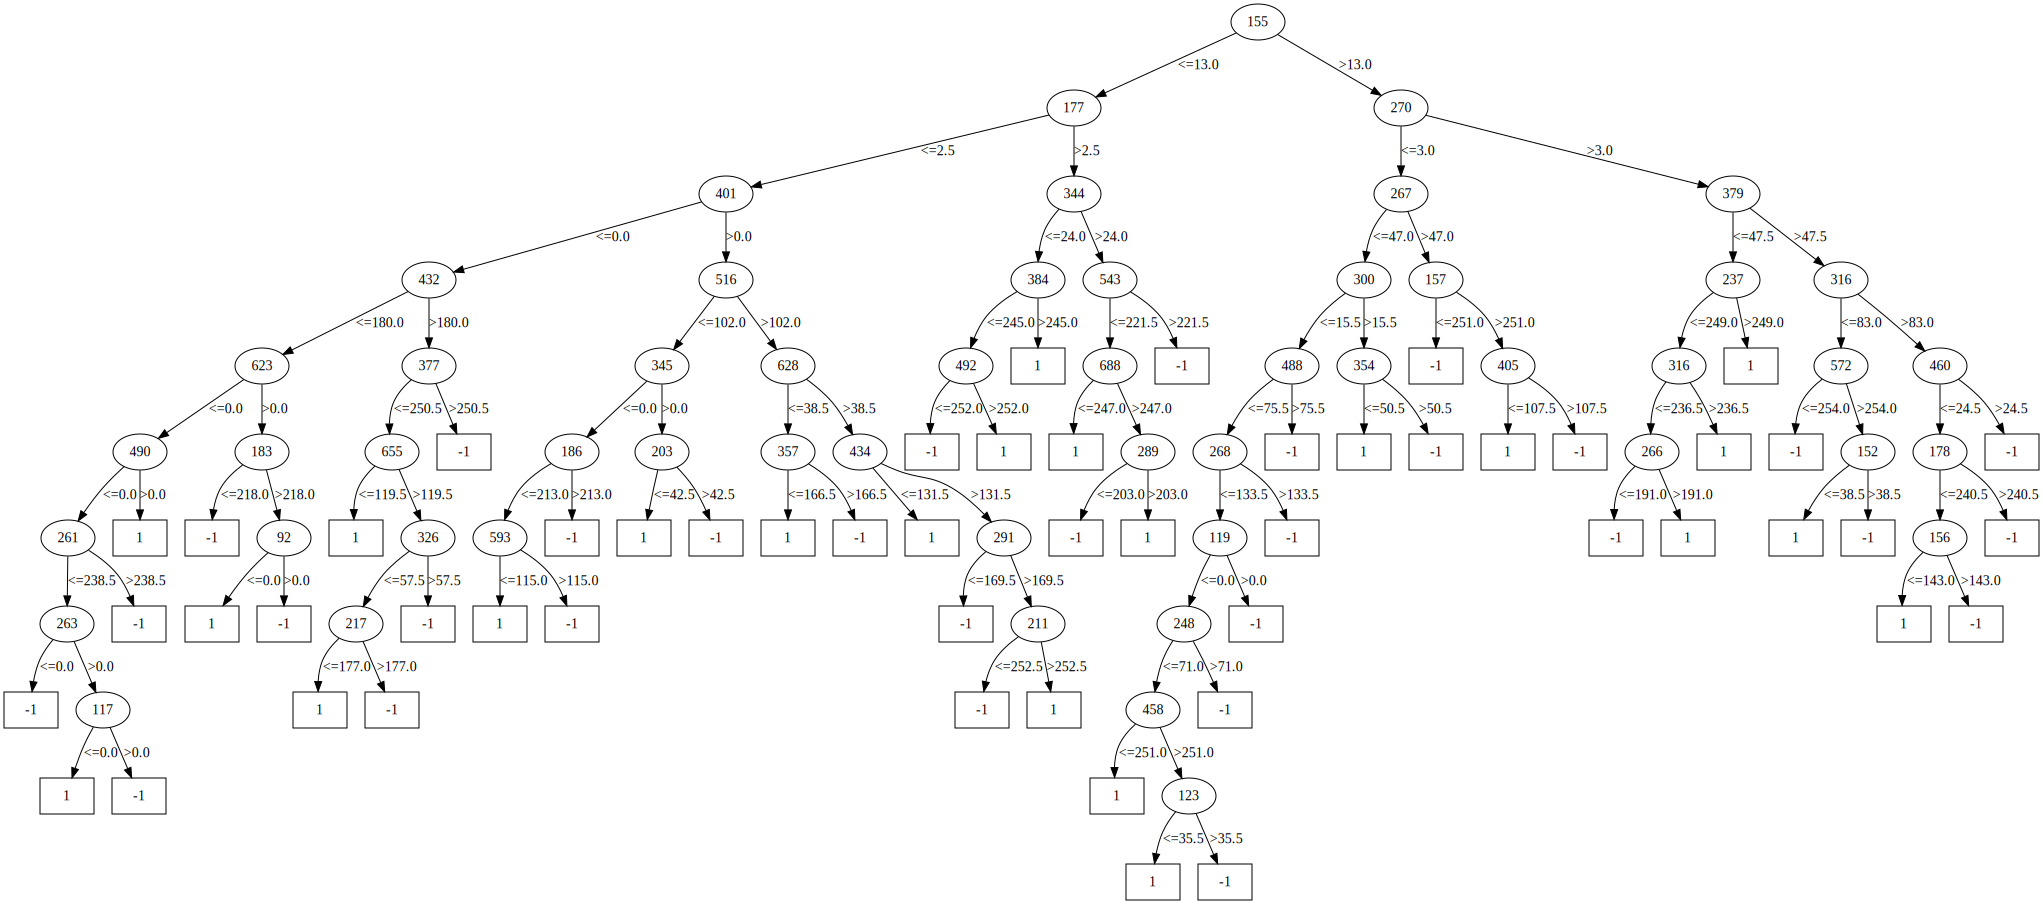

In [160]:
#Arbre de decision apres dicretisation des attributs numériques (données brutes) entropie minimale = 0

importlib.reload(cl)
importlib.reload(ut)

arbre = cl.ClassifierArbreDecisionNumerique(0.0)
arbre.train(train_data_desc,train_data_label)

graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)
graphe_arbre


In [174]:
# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+}".format("line", i , train_data_label[i] , arbre.predict(train_data_desc[i,:])))

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", arbre.accuracy(train_data_desc,train_data_label))  

# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} ".format("line", i ,test_data_label[i],arbre.predict(test_data_desc[i,:])))

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", arbre.accuracy(test_data_desc,test_data_label)) 

Classification du dataset:
	0 : -1 ---> -1
	1 : -1 ---> -1
	2 : -1 ---> -1
	3 : -1 ---> -1
	4 : -1 ---> -1
	5 : -1 ---> -1
	6 : -1 ---> -1
	7 : -1 ---> -1
	8 : -1 ---> -1
	9 : -1 ---> -1
	10 : -1 ---> -1
	11 : -1 ---> -1
	12 : -1 ---> -1
	13 : -1 ---> -1
	14 : -1 ---> -1
	15 : -1 ---> -1
	16 : -1 ---> -1
	17 : -1 ---> -1
	18 : -1 ---> -1
	19 : -1 ---> -1
	20 : -1 ---> -1
	21 : -1 ---> -1
	22 : -1 ---> -1
	23 : -1 ---> -1
	24 : -1 ---> -1
	25 : -1 ---> -1
	26 : -1 ---> -1
	27 : -1 ---> -1
	28 : -1 ---> -1
	29 : -1 ---> -1
	30 : -1 ---> -1
	31 : -1 ---> -1
	32 : -1 ---> -1
	33 : -1 ---> -1
	34 : -1 ---> -1
	35 : -1 ---> -1
	36 : -1 ---> -1
	37 : -1 ---> -1
	38 : -1 ---> -1
	39 : -1 ---> -1
	40 : -1 ---> -1
	41 : -1 ---> -1
	42 : -1 ---> -1
	43 : -1 ---> -1
	44 : -1 ---> -1
	45 : -1 ---> -1
	46 : -1 ---> -1
	47 : -1 ---> -1
	48 : -1 ---> -1
	49 : -1 ---> -1
	50 : -1 ---> -1
	51 : -1 ---> -1
	52 : -1 ---> -1
	53 : -1 ---> -1
	54 : -1 ---> -1
	55 : -1 ---> -1
	56 : -1 ---> -1
	57 : -1 ---> 

	815 : +1 ---> +1
	816 : +1 ---> +1
	817 : +1 ---> +1
	818 : +1 ---> +1
	819 : +1 ---> +1
	820 : +1 ---> +1
	821 : +1 ---> +1
	822 : +1 ---> +1
	823 : +1 ---> +1
	824 : +1 ---> +1
	825 : +1 ---> +1
	826 : +1 ---> +1
	827 : +1 ---> +1
	828 : +1 ---> +1
	829 : +1 ---> +1
	830 : +1 ---> +1
	831 : +1 ---> +1
	832 : +1 ---> +1
	833 : +1 ---> +1
	834 : +1 ---> +1
	835 : +1 ---> +1
	836 : +1 ---> +1
	837 : +1 ---> +1
	838 : +1 ---> +1
	839 : +1 ---> +1
	840 : +1 ---> +1
	841 : +1 ---> +1
	842 : +1 ---> +1
	843 : +1 ---> +1
	844 : +1 ---> +1
	845 : +1 ---> +1
	846 : +1 ---> +1
	847 : +1 ---> +1
	848 : +1 ---> +1
	849 : +1 ---> +1
	850 : +1 ---> +1
	851 : +1 ---> +1
	852 : +1 ---> +1
	853 : +1 ---> +1
	854 : +1 ---> +1
	855 : +1 ---> +1
	856 : +1 ---> +1
	857 : +1 ---> +1
	858 : +1 ---> +1
	859 : +1 ---> +1
	860 : +1 ---> +1
	861 : +1 ---> +1
	862 : +1 ---> +1
	863 : +1 ---> +1
	864 : +1 ---> +1
	865 : +1 ---> +1
	866 : +1 ---> +1
	867 : +1 ---> +1
	868 : +1 ---> +1
	869 : +1 ---> +1
	870 : +1 

Taux de bonne classification sur le dataset de test :  0.867


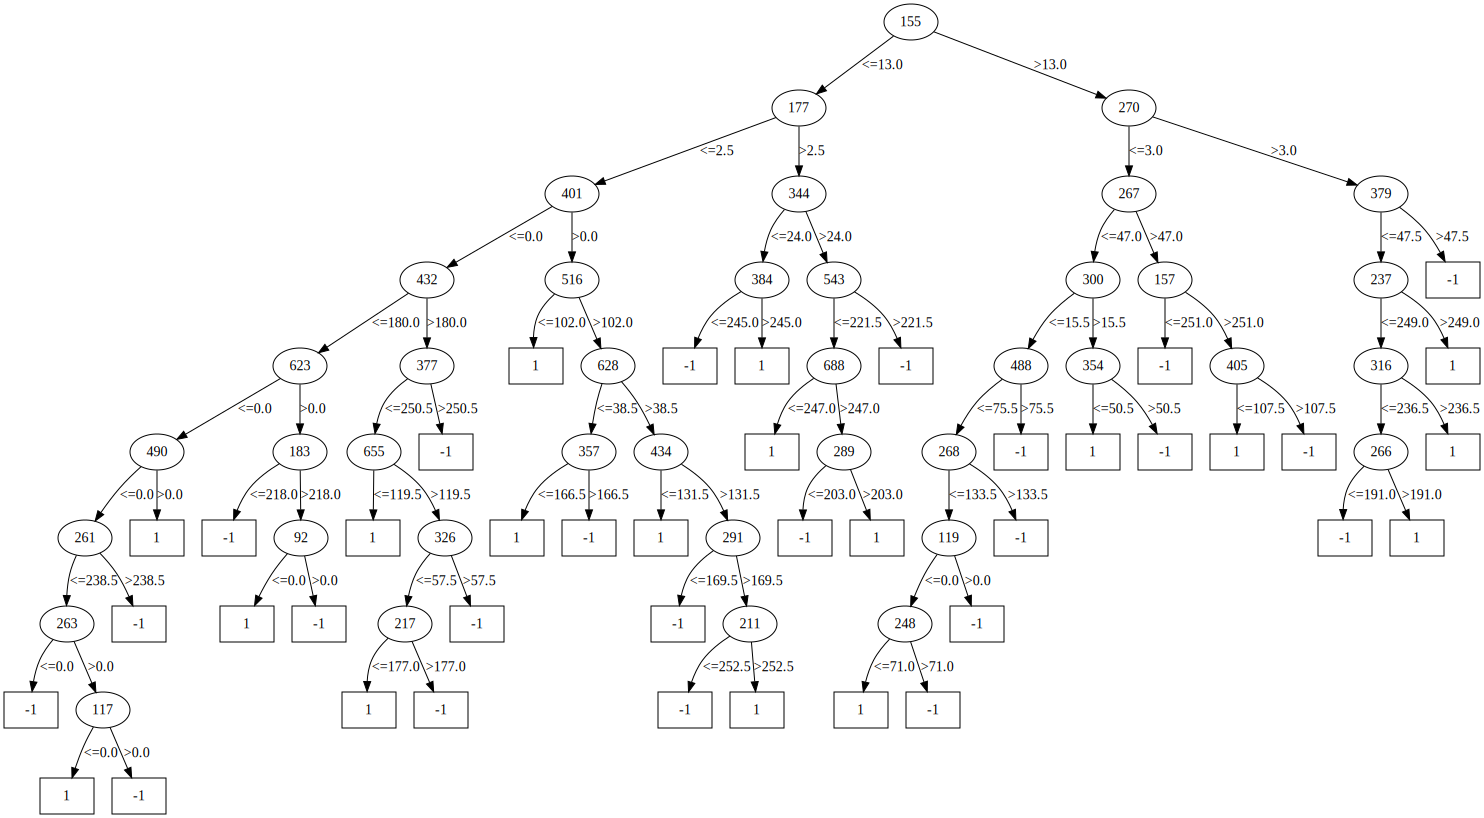

In [9]:
#Arbre de decision apres dicretisation des attributs numériques (données brutes) entropie minimale = 0.2

arbre2 = cl.ClassifierArbreDecisionNumerique(0.2)
arbre2.train(train_data_desc,train_data_label)

graphe_arbre2 = gv.Digraph(format='png')
arbre2.affiche(graphe_arbre2)
graphe_arbre2

In [10]:
# Classification du dataset (contrôle de predict et score) avec le data set train :
print("Classification du dataset:")
for i in range(train_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+}".format("line", i , train_data_label[i] , arbre2.predict(train_data_desc[i,:])))

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset d'apprentissage : ", arbre2.accuracy(train_data_desc,train_data_label))  

# Classification du dataset (contrôle de predict et score) avec le data set test :
print("Classification du dataset:")
for i in range(test_data_desc.shape[0]):
    print("\t{1} : {2:+} ---> {3:+} ".format("line", i ,test_data_label[i],arbre2.predict(test_data_desc[i,:])))

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset de test : ", arbre2.accuracy(test_data_desc,test_data_label)) 

Classification du dataset:
	0 : -1 ---> -1
	1 : -1 ---> -1
	2 : -1 ---> -1
	3 : -1 ---> -1
	4 : -1 ---> -1
	5 : -1 ---> -1
	6 : -1 ---> -1
	7 : -1 ---> -1
	8 : -1 ---> -1
	9 : -1 ---> -1
	10 : -1 ---> -1
	11 : -1 ---> -1
	12 : -1 ---> -1
	13 : -1 ---> -1
	14 : -1 ---> -1
	15 : -1 ---> -1
	16 : -1 ---> -1
	17 : -1 ---> -1
	18 : -1 ---> -1
	19 : -1 ---> -1
	20 : -1 ---> -1
	21 : -1 ---> -1
	22 : -1 ---> -1
	23 : -1 ---> -1
	24 : -1 ---> -1
	25 : -1 ---> -1
	26 : -1 ---> -1
	27 : -1 ---> -1
	28 : -1 ---> -1
	29 : -1 ---> -1
	30 : -1 ---> -1
	31 : -1 ---> -1
	32 : -1 ---> -1
	33 : -1 ---> +1
	34 : -1 ---> -1
	35 : -1 ---> -1
	36 : -1 ---> -1
	37 : -1 ---> -1
	38 : -1 ---> -1
	39 : -1 ---> -1
	40 : -1 ---> -1
	41 : -1 ---> -1
	42 : -1 ---> -1
	43 : -1 ---> -1
	44 : -1 ---> -1
	45 : -1 ---> -1
	46 : -1 ---> +1
	47 : -1 ---> -1
	48 : -1 ---> -1
	49 : -1 ---> -1
	50 : -1 ---> -1
	51 : -1 ---> -1
	52 : -1 ---> -1
	53 : -1 ---> -1
	54 : -1 ---> -1
	55 : -1 ---> -1
	56 : -1 ---> -1
	57 : -1 ---> 

	933 : +1 ---> +1
	934 : +1 ---> +1
	935 : +1 ---> +1
	936 : +1 ---> +1
	937 : +1 ---> +1
	938 : +1 ---> +1
	939 : +1 ---> +1
	940 : +1 ---> +1
	941 : +1 ---> +1
	942 : +1 ---> +1
	943 : +1 ---> +1
	944 : +1 ---> +1
	945 : +1 ---> +1
	946 : +1 ---> +1
	947 : +1 ---> +1
	948 : +1 ---> +1
	949 : +1 ---> +1
	950 : +1 ---> +1
	951 : +1 ---> +1
	952 : +1 ---> +1
	953 : +1 ---> +1
	954 : +1 ---> +1
	955 : +1 ---> +1
	956 : +1 ---> +1
	957 : +1 ---> +1
	958 : +1 ---> +1
	959 : +1 ---> +1
	960 : +1 ---> +1
	961 : +1 ---> +1
	962 : +1 ---> +1
	963 : +1 ---> +1
	964 : +1 ---> +1
	965 : +1 ---> +1
	966 : +1 ---> +1
	967 : +1 ---> +1
	968 : +1 ---> +1
	969 : +1 ---> +1
	970 : +1 ---> +1
	971 : +1 ---> +1
	972 : +1 ---> +1
	973 : +1 ---> +1
	974 : +1 ---> +1
	975 : +1 ---> +1
	976 : +1 ---> +1
	977 : +1 ---> +1
	978 : +1 ---> +1
	979 : +1 ---> +1
	980 : +1 ---> +1
	981 : +1 ---> +1
	982 : +1 ---> +1
	983 : +1 ---> +1
	984 : +1 ---> +1
	985 : +1 ---> +1
	986 : +1 ---> +1
	987 : +1 ---> +1
	988 : +1 